<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_6/AST_Clase_6_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1. VAR

Aqui hacemos una simulacion de un proceso VAR, de 1 rezago =
<br>

Suponga el siguiente modelo dinámico

\begin{align} 
x_t &= 0.9 + 0.8x_{t-1} + 0.7y_{t-1} + \epsilon_{x,t} \\
y_t &= 1.8 - 0.2x_{t-1} + 0.8y_{t-1} + \epsilon_{y,t}
\end{align}

que puede escribirse
$$
\underset{X_t}{\begin{pmatrix}x_t \\ y_t\end{pmatrix}} = 
\underset{c}{\begin{pmatrix}0.9 \\ 1.8\end{pmatrix}} +
\underset{A}{\begin{pmatrix}0.8 & 0.7 \\ -0.2 & 0.8\end{pmatrix}}
\underset{X_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\end{pmatrix}}
$$

VAR = aqui se trabaja con vectores, q es la variable dependiente ( variables endogenas ) la caract es q estas no solo dependen de sus propios rezagos, sino tb de los valores pasados de las otras variables. Las variables estan relacionadas intertemporalmentes. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

Simulamos una muestra de 100 observaciones de un VAR(1), empezando por ingresar 

1.   Elemento de lista
2.   Elemento de lista

los valores de los parametros


In [ ]:
T = 100

A = np.array([[0.8, 0.7], [-0.2, 0.8]])
c = np.array([[0.9], [1.8]])

Matriz de Covarianzas

In [ ]:
Ω = 0.04*np.array([[1, 0.7],[0.7,1.49]])

Funcion para poder simular los datos =

In [ ]:
P = np.linalg.cholesky(Ω)
P

array([[0.2 , 0.  ],
       [0.14, 0.2 ]])

In [ ]:
np.random.seed(16)

Calculamos la media del proceso $\mu = (I-A)^{-1}c$ y lo usamos como valor inicial de la simulación.

In [ ]:
𝜇 = (np.linalg.inv(np.eye(2) - A) @ c)

X = np.zeros((T,2))
X[0] = 𝜇.T

for t in range(1, T):
    X[t] = c.T + X[t-1] @ A.T + np.random.randn(2) @ P.T

Cada fila es una observacion y cada columna una variable

In [ ]:
X

array([[ 8.        ,  1.        ],
       [ 8.02558974,  0.71221813],
       [ 7.70013089,  0.69469711],
       [ 7.29929372,  0.51848851],
       [ 6.92458737,  0.73026134],
       [ 6.79347341,  0.91287472],
       [ 6.82241841,  1.16431763],
       [ 7.00507621,  1.04644945],
       [ 7.16807165,  1.56508437],
       [ 7.67583379,  1.29018149],
       [ 7.72776228,  1.65877149],
       [ 8.19930532,  1.53275347],
       [ 8.58763998,  1.74748176],
       [ 9.13654217,  1.71241893],
       [ 9.45007521,  1.25924177],
       [ 9.3695666 ,  0.86931482],
       [ 8.72320814, -0.07246576],
       [ 8.08254918,  0.39163142],
       [ 7.76986181,  0.69885566],
       [ 7.65179592,  0.62203835],
       [ 7.22047138,  0.46114894],
       [ 6.87147818,  0.46701866],
       [ 6.45646069,  0.72791617],
       [ 6.68199276,  1.47474571],
       [ 7.61278265,  1.74994657],
       [ 8.32492171,  1.73758953],
       [ 8.83806279,  1.97044316],
       [ 9.68470254,  1.94384013],
       [10.21390197,

Aqui trabajamos para poder seguir con una serie de tiempo.

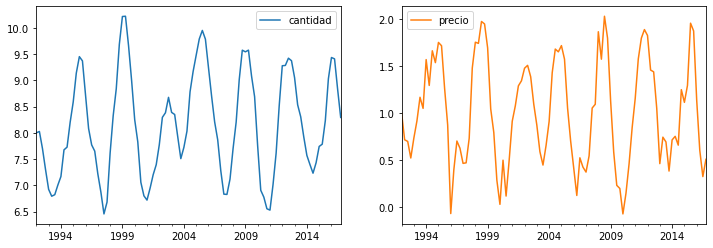

In [ ]:
trimestres = pd.date_range(start='1992q1', freq='Q', periods=T)
data = pd.DataFrame(X, columns=['cantidad', 'precio'], index=trimestres)

fig, axs = plt.subplots(1,2,figsize=[12,4])
data.plot(subplots=True, ax=axs);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


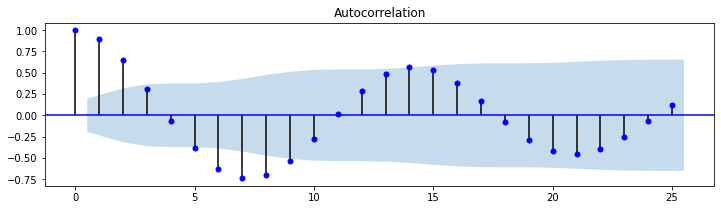

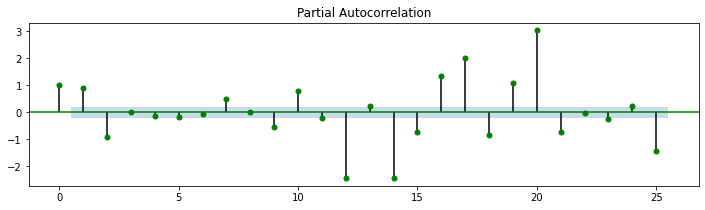

In [ ]:
acf_plot = plot_acf(data.cantidad, lags=25, color= 'blue')
pacf_plot = plot_pacf(data.cantidad, lags=25, color= 'green')

pacf_plot.set_size_inches(12,3)
acf_plot.set_size_inches(12,3)

In [ ]:
Augmented_Dickey_Fuller_Test_func(data['cantidad'],'cantidad')

Results of Dickey-Fuller Test for column: cantidad
Test Statistic                 -3.528172
p-value                         0.007292
No Lags Used                   12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


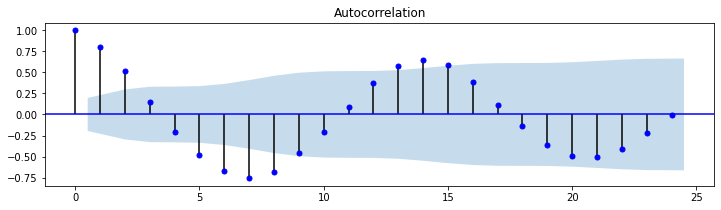

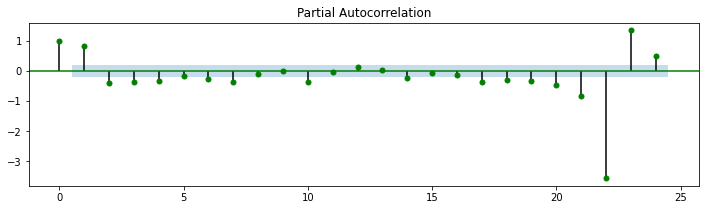

In [ ]:
acf_plot = plot_acf(data.precio, lags=24, color= 'blue')
pacf_plot = plot_pacf(data.precio, lags=24, color= 'green')

pacf_plot.set_size_inches(12,3)
acf_plot.set_size_inches(12,3)

In [ ]:
Augmented_Dickey_Fuller_Test_func(data['precio'],'precio')

Results of Dickey-Fuller Test for column: precio
Test Statistic                 -5.274128
p-value                         0.000006
No Lags Used                    9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


[texto del enlace](https://)Estimacion del VAr a partir de los datos simulados

In [ ]:
model = VAR(data)

Determina el rezago optimo que uno esta dispuesto a considerar

In [ ]:
model.select_order(5).summary()

,AIC,BIC,FPE,HQIC
0,-1.168,-1.114,0.3110,-1.146
1,-6.478*,-6.316*,0.001537*,-6.412*
2,-6.460,-6.191,0.001566,-6.351
3,-6.389,-6.012,0.001681,-6.237
4,-6.359,-5.875,0.001733,-6.163
5,-6.311,-5.720,0.001819,-6.072


Estimamos el VAR con un unico rezago

In [ ]:
results = model.fit(maxlags=1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Jul, 2022
Time:                     12:49:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.33706
Nobs:                     99.0000    HQIC:                  -6.43071
Log likelihood:           46.5202    FPE:                 0.00151202
AIC:                     -6.49434    Det(Omega_mle):      0.00142439
--------------------------------------------------------------------
Results for equation cantidad
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.822641         0.155447            5.292           0.000
L1.cantidad         0.808834         0.019385           41.726           0.000
L1.precio           0.731017         0.034625           21.112   

Veo que los coefficientes se aproximan a los datos simulados ( tanto en cantidad) como en precio )

Pruebas de causalidad de Granger. 
La idea es ver si los rezagos de una variable tienen poder explicativo sobre otra variable. Aqui es CAUSALIDAD lo que se pureba. Correlacion no implica causalidad. La idea es ver, quien esta causando a quien.

In [ ]:
# Aqui quiero saber si rezagos de la cantidad, causa al precio en el sentido de Granger
results.test_causality('precio', 'cantidad').summary()

Test statistic,Critical value,p-value,df
71.66,3.890,0.000,"(1, 192)"


Vemos q dice la hipotesis nula ( q la cantidad no causa en el sentido de Granger al precio) . Aqui rechazo H0 . Lo veo tanto en que Test stadistic > Valor critico como en el pvalor menor a 0.05 )

In [ ]:
# Aqui quiero saber el precio, causa a la cantidad en el sentido de Granger
results.test_causality('cantidad', 'precio').summary()

Test statistic,Critical value,p-value,df
445.7,3.890,0.000,"(1, 192)"


Funcion de impulso respuesta.
Vemos efectos dinamicos de las variables .
Simulamos impulsos unitarios, a la izq el impuslo es ( 1 / 0 ) [ la cantidad sube 1 y el precio no cambia ] .<br>
Luego q la cantidad sube 0  y el precio una unidad ( 0 / 1 ) . Son impulsos unitarios .<br>
La linea cero representa el equilibrio en el largo plazo

In [ ]:
# prueba para ver los parametros
temp = results.irf?

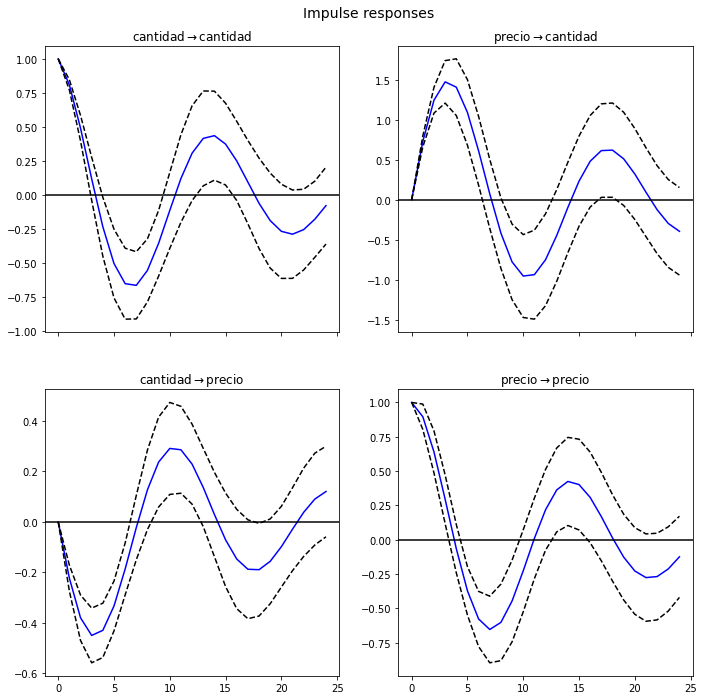

In [ ]:
results.irf(24).plot();
# cantidad --> precio dice = q pasa cuando cambia la cantidad , q le pasa al precio. Ej, cuando aumenta la cantidad el precio baja , luego sube y se estabiliza.
# en el eje equi son periodos
# en el eje y son los desvios con respecto al equilibrio.

# siempre tiende al equilibrio.  Si un VAR es estable, siempre tiende a cero a largo plazo

# 

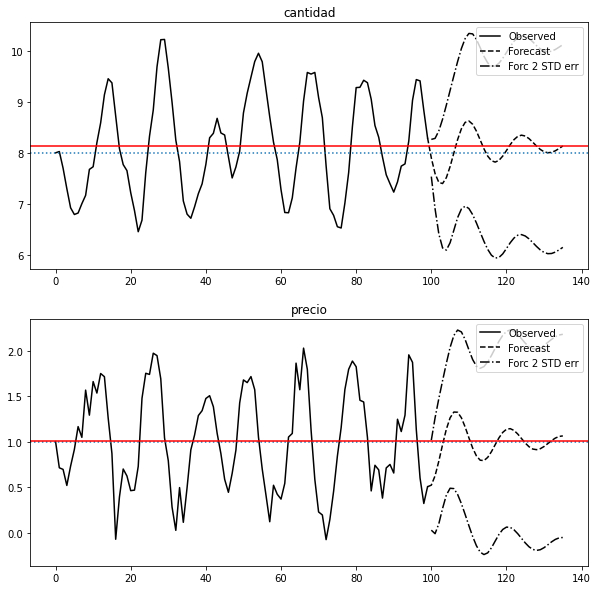

In [ ]:
fig = results.plot_forecast(36)

for i in range(2):
    fig.axes[i].axhline(𝜇[i], ls=':')
    fig.axes[i].axhline(results.mean()[i], color='r')
    

En rojo me da la media estimada, 8 y 1 . Aqui, vemos otra vez q "converge a equilibrio" por eso se va a la linea roja. vemos graficos parecidos al impulso respuesta. los pronosticos del VAR, en el largo plazo el pronostico va al valor medio de la serie ya que el sistema es estacionario